In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/d/sobhanmoosavi/us-accidents/US_Accidents_Dec20_Updated.csv


# US Accidents Analysis

## Importing Required Libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

##  Data Handeling

### Loading Dataset into Pandas Dataframe

In [10]:
data_filepath = "/kaggle/input/d/sobhanmoosavi/us-accidents/US_Accidents_Dec20_Updated.csv"
data = pd.read_csv(data_filepath)
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


### Information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

#### Columns in dataframe

In [12]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### Statistical Description of each column

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2906610.0,2.288649,0.554162,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,2906610.0,36.530271,5.013964,24.555269,33.664527,36.099769,40.375055,4.900220e+01
Start_Lng,2906610.0,-96.426758,17.754125,-124.623833,-117.823219,-91.166901,-80.858141,-6.711317e+01
End_Lat,2623789.0,36.517333,5.016609,24.555269,33.646589,36.058980,40.331330,4.907500e+01
End_Lng,2623789.0,-96.203669,17.659713,-124.623833,-117.701990,-91.051628,-80.846794,-6.710924e+01
Distance(mi),2906610.0,0.398054,1.592556,0.000000,0.000000,0.000000,0.279000,3.336300e+02
Number,1014938.0,6789.727574,16972.246955,0.000000,965.000000,3093.000000,7976.000000,9.999997e+06
Temperature(F),2839386.0,60.988730,18.452580,-89.000000,48.900000,63.000000,75.000000,2.030000e+02
Wind_Chill(F),1722751.0,54.990478,22.195422,-89.000000,39.000000,58.000000,72.000000,1.740000e+02
Humidity(%),2835340.0,65.377577,22.878537,1.000000,49.000000,68.000000,85.000000,1.000000e+02


#### Numerical Columns to deal with

In [14]:
# int, float and boolean data
print(data.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(data.count(numeric_only=True)))

Severity             2906610
Start_Lat            2906610
Start_Lng            2906610
End_Lat              2623789
End_Lng              2623789
Distance(mi)         2906610
Number               1014938
Temperature(F)       2839386
Wind_Chill(F)        1722751
Humidity(%)          2835340
Pressure(in)         2849702
Visibility(mi)       2834532
Wind_Speed(mph)      2599447
Precipitation(in)    1605284
Amenity              2906610
Bump                 2906610
Crossing             2906610
Give_Way             2906610
Junction             2906610
No_Exit              2906610
Railway              2906610
Roundabout           2906610
Station              2906610
Stop                 2906610
Traffic_Calming      2906610
Traffic_Signal       2906610
Turning_Loop         2906610
dtype: int64
Total No. of Numerical Columns: 27


Percentage of Missing Values

In [15]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Sunrise_Sunset            0.003784
Civil_Twilight            0.003784
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
City                      0.003716
dtype: float64


Getting List of Columns Having Null Values

In [16]:
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Number', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


Checking Missing Values Pattern in Dataframe

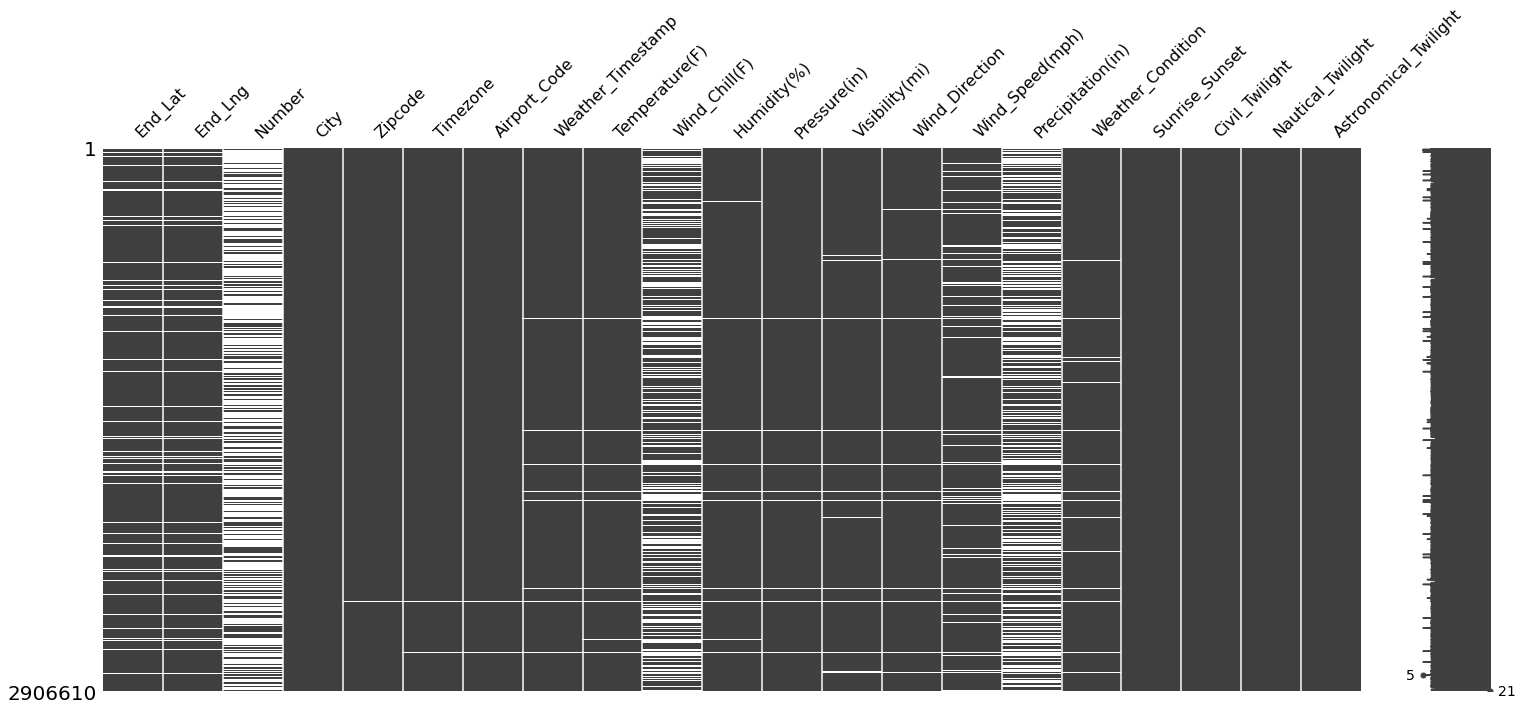

In [17]:
mn.matrix(data[null_cols]);

Drop Four Columns [End_Lng, End_Lat, Number, TMC ] having high no. of Missing Values

In [19]:
new_data_a = data.drop(columns=["End_Lng", "End_Lat", "Number"], axis=0)

Drop Rows w.r.t to columns having least percentage of missing values (do not effect much to data with 4.2 million records)

In [20]:
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City','Description'])

In [21]:
new_data_b.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1090741
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           229916
Precipitation(in)        1228285
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [22]:
final_data = new_data_b.drop(columns = 'ID', axis=0)

In [23]:
final_data.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1090741
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           229916
Precipitation(in)        1228285
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction  

## Exploratory Data Analysis

### Location

In [26]:
state_counts = final_data["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [27]:
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['SC' 'NC' 'CA' 'NV' 'FL' 'CO' 'TN' 'NY' 'TX' 'AZ' 'NJ' 'MI' 'GA' 'VA'
 'IN' 'LA' 'PA' 'MN' 'OH' 'CT' 'IL' 'MD' 'MO' 'OR' 'NE' 'OK' 'UT' 'WA'
 'AL' 'WI' 'MA' 'DC' 'MS' 'KY' 'ME' 'IA' 'KS' 'WV' 'AR' 'ID' 'RI' 'WY'
 'NM' 'MT' 'NH' 'DE' 'ND' 'SD' 'VT']
Total No. of State in Dataset:  49


- Total No. of State in Dataset:  49
- There are 50 states in US
- New York not in dataset

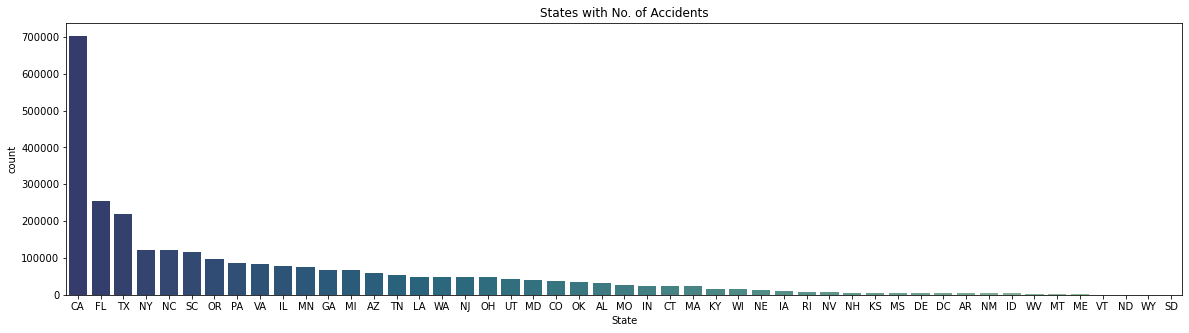

In [28]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=final_data, orient = 'v', palette = "crest_r", order = final_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");

- California (CA) is the 3rd most largest state of US after Texas (TX) and Alaska (AL)
- Also California (CA) is the most populated among all, followed by Texas (TX)
- Alaska (AL) is the largest state but least populated state at 48th rank

In [29]:
print("City Code: ", final_data.City.unique())
print("Total No. of Cities in Dataset: ", len(final_data.City.unique()))

City Code:  ['Greenville' 'Charlotte' 'Los Gatos' ... 'Allons' 'Adolphus' 'Gowanda']
Total No. of Cities in Dataset:  11537


- Total No. of Cities in Dataset:  11537
- There were 19,502 incorporated places registered in the United States

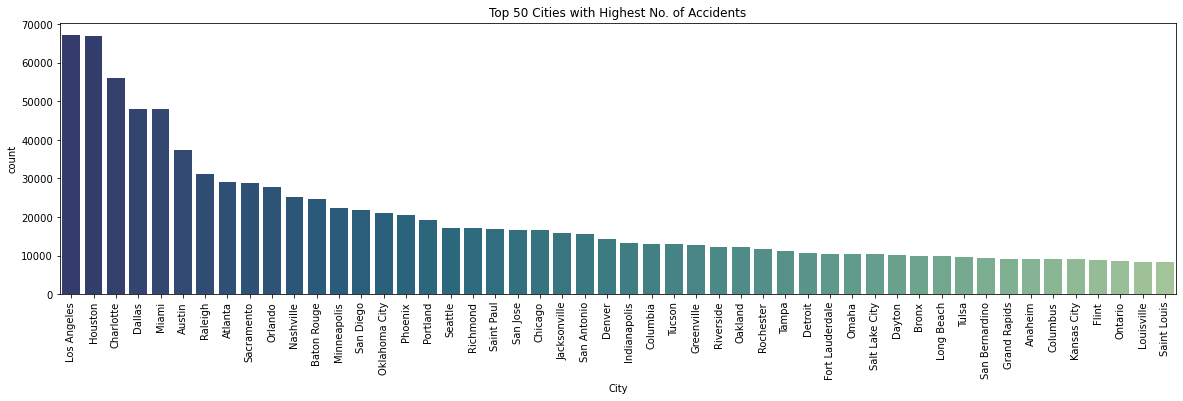

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

# Timestamp 

In [31]:
final_data.Start_Time = pd.to_datetime(final_data.Start_Time)
final_data.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [32]:
final_data['Month'] = final_data['Start_Time'].dt.month
final_data['Year'] = final_data['Start_Time'].dt.year
final_data['Hour'] = final_data['Start_Time'].dt.hour
final_data['Weekday'] = final_data['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = final_data[final_data.Start_Time.dt.year == 2016]
data_2017 = final_data[final_data.Start_Time.dt.year == 2017]
data_2018 = final_data[final_data.Start_Time.dt.year == 2018]
data_2019 = final_data[final_data.Start_Time.dt.year == 2019]
data_2020 = final_data[final_data.Start_Time.dt.year == 2020]
data_2017_2019 = final_data[(final_data["Year"] >= 2017) & (final_data["Year"] <= 2019)]

### Yearly

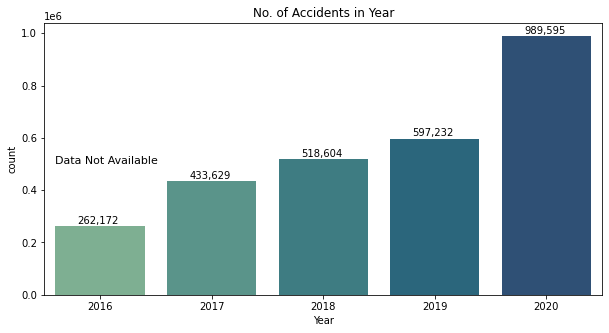

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=final_data, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

### Monthly

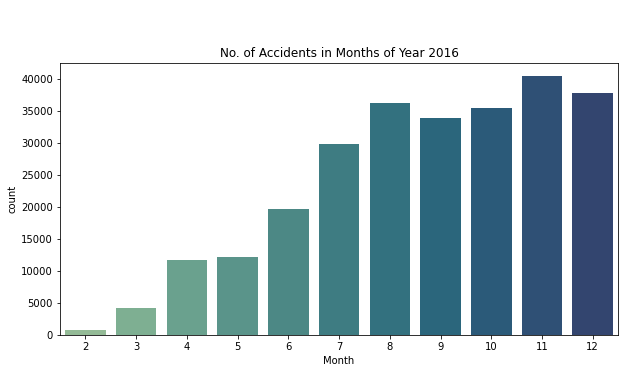

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

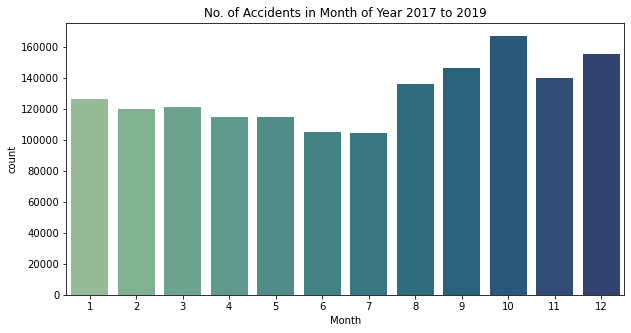

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()

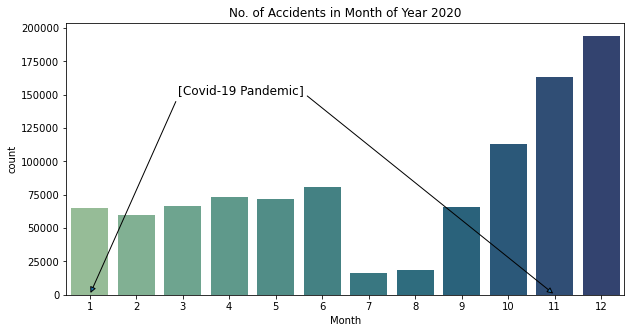

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(2,150000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(4.5,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

## Weekly

### All Weeks of Year 2016

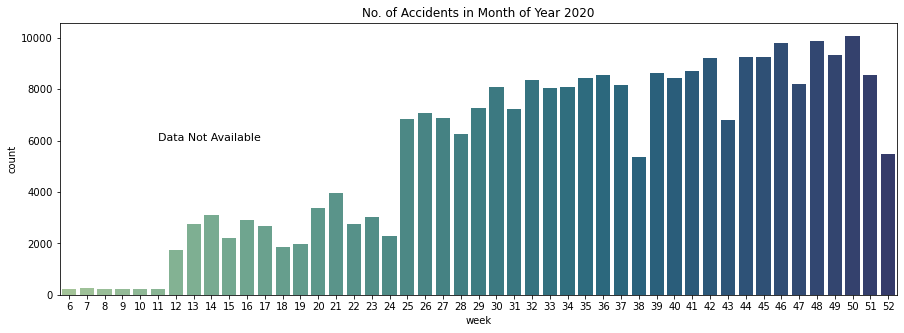

In [39]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(5,6000), fontsize=11)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

### All Weeks of Year 2017 to 2019

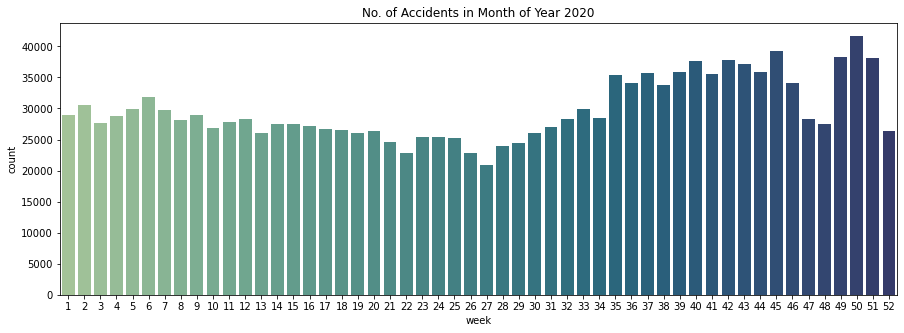

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2017_2019.Start_Time.dt.isocalendar().week, data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

### All Weeks of Year 2020

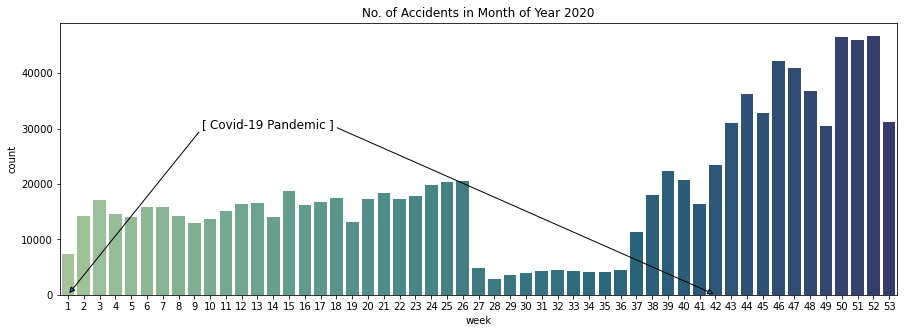

In [41]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2020.Start_Time.dt.isocalendar().week, data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(9,30000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(8.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(41,0),xytext=(16.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

Weekdays

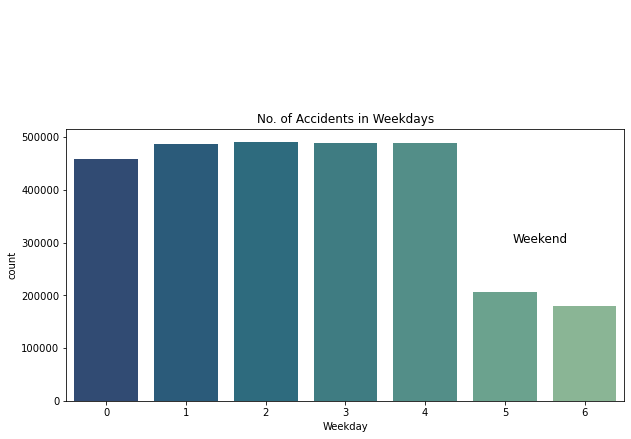

In [42]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=final_data, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,728000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,300000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

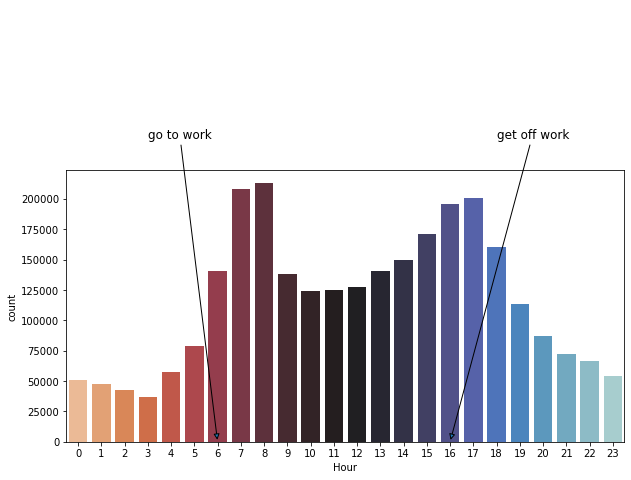

In [43]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=final_data, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

## Severity

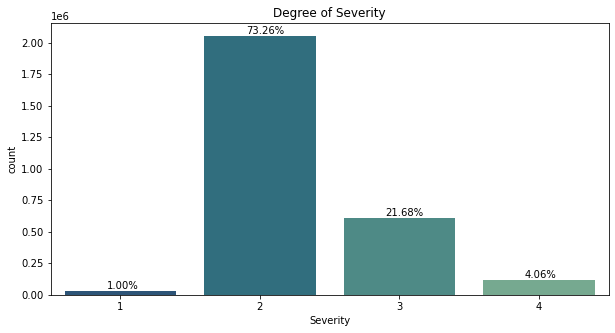

In [44]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=final_data, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(final_data.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

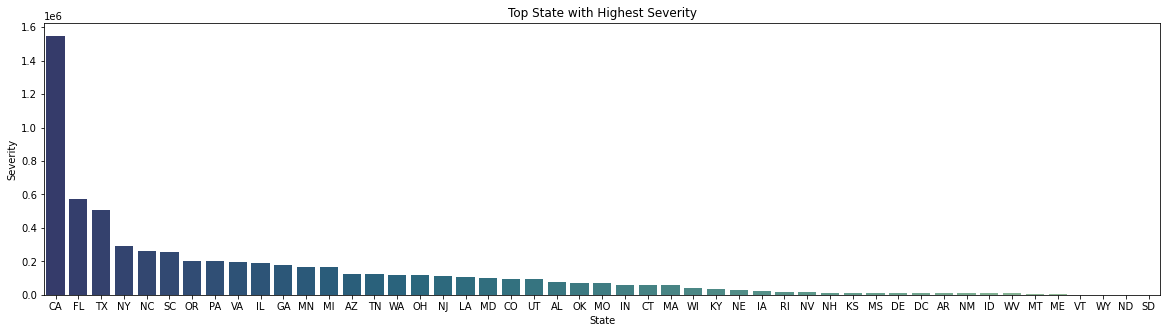

In [45]:
df_state = final_data.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()

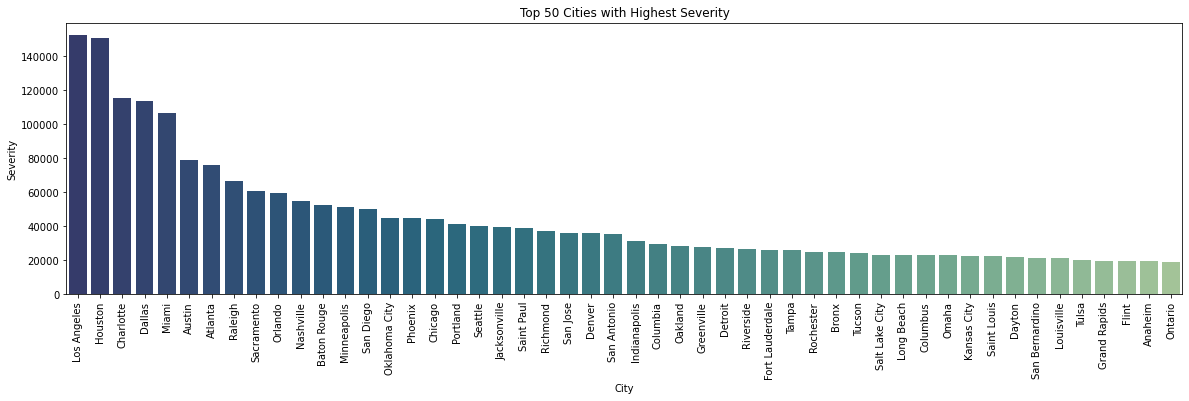

In [46]:
df_city = final_data.groupby('City').sum('Severity')[['Severity']]
df_city = df_city.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'City', y = 'Severity', data = df_city, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest Severity")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

### Weather Stimuli Impact

#### Related Columns

In [54]:
final_data.iloc[:10, 17:26]

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair
1,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy
2,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair
3,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear
4,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast
5,73.4,NaN,33.0,30.17,10.0,NNW,6.9,NaN,Clear
6,28.0,28.0,88.0,24.67,2.0,NE,3.0,0.0,Light Snow
7,55.0,55.0,40.0,29.86,10.0,E,5.0,0.0,Fair
8,87.1,NaN,43.0,30.04,10.0,NE,8.1,NaN,Mostly Cloudy
9,57.0,57.0,77.0,29.08,5.0,VAR,5.0,0.0,Mostly Cloudy


### Location Impact

#### Related Columns

In [55]:
final_data.iloc[:10, 27:39]

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


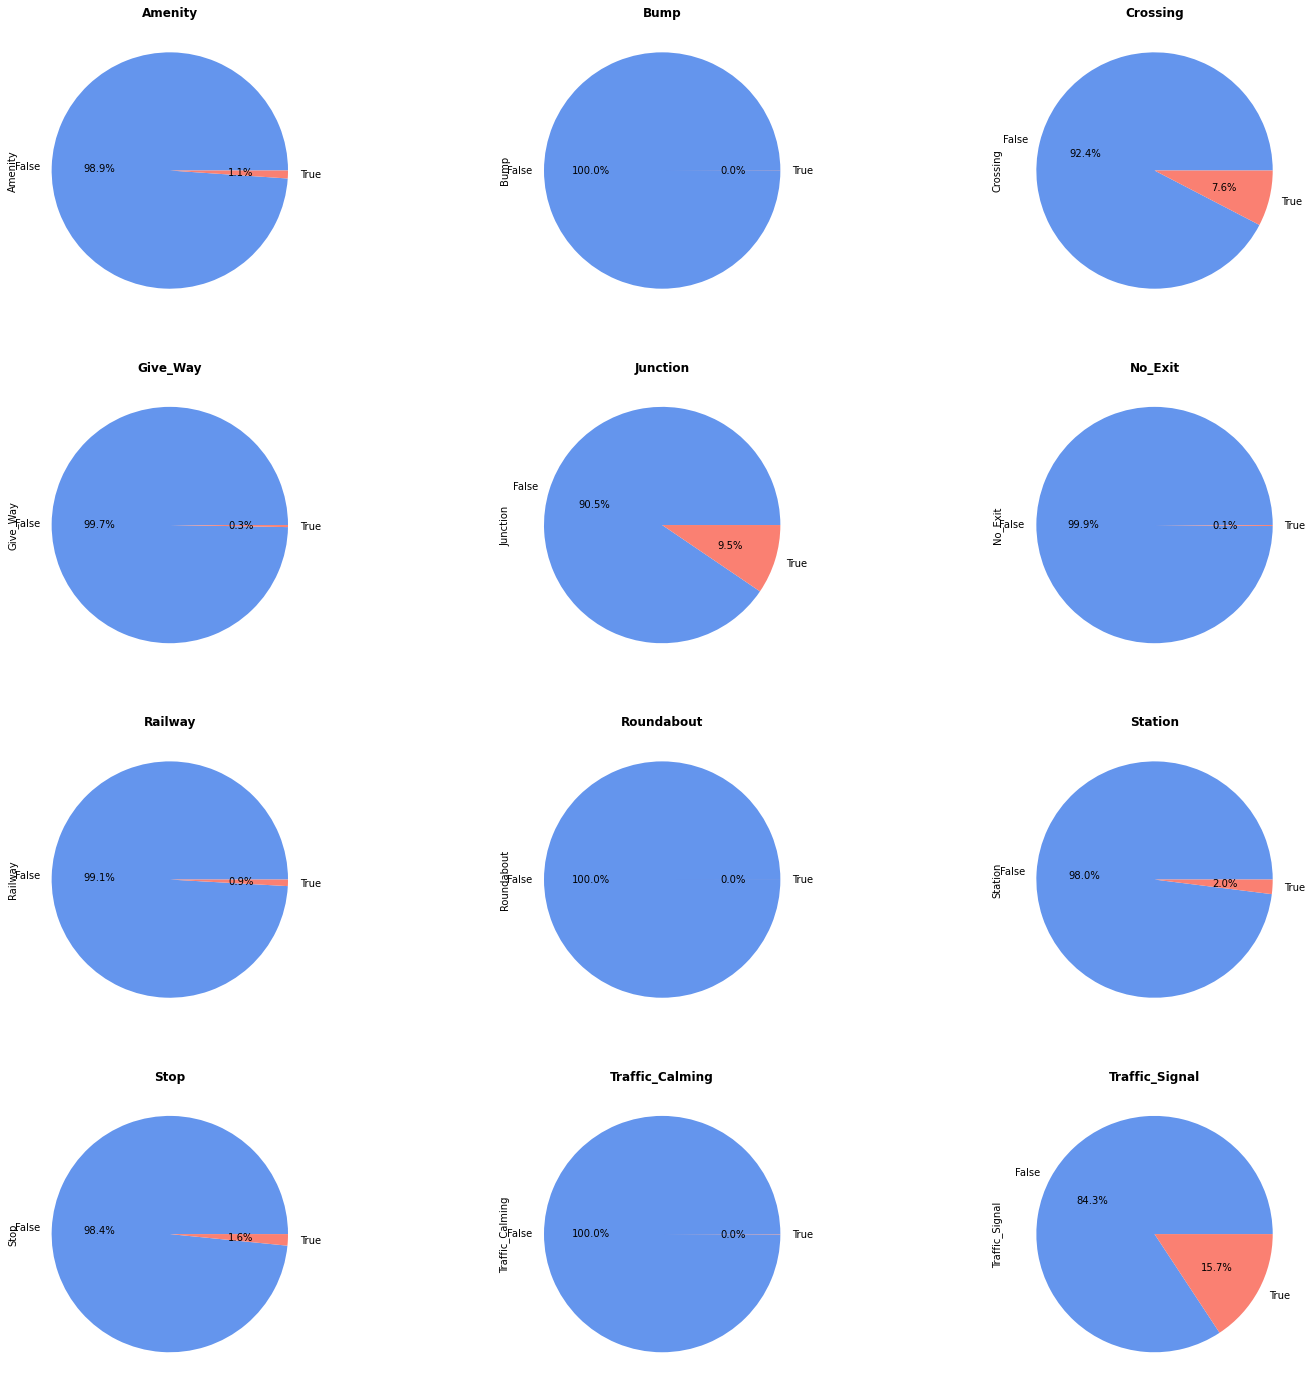

In [53]:
f,ax=plt.subplots(4,3,figsize=(25,25))
ax[0,0] = final_data['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["cornflowerblue","salmon"])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = final_data['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["cornflowerblue","salmon"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = final_data['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["cornflowerblue","salmon"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = final_data['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["cornflowerblue","salmon"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = final_data['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["cornflowerblue","salmon"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = final_data['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["cornflowerblue","salmon"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = final_data['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["cornflowerblue","salmon"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = final_data['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["cornflowerblue","salmon"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = final_data['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["cornflowerblue","salmon"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = final_data['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["cornflowerblue","salmon"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = final_data['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["cornflowerblue","salmon"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = final_data['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["cornflowerblue","salmon"])
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")
plt.show()